# Caminatas aleatorias

En este notebook, empezaremos a explorar Julia, al aplicarlo para modelar una **caminata aleatoria**, que es básicamente un **movimiento Browniano** -- un movimiento aleatorio de una partícula moviéndose en un fluido.

Llevaremos a cabo una primera simulación computacional de este sistema. Para hacerlo, veremos por encima algunos conceptos de programación en Julia. Luego profundizaremos en esos conceptos, pero el punto de este notebook es llegar lo más rápido posible a poder hacer algo interesante, y así mostrar el poder del lenguaje.

## Modelaje

Para hacer un modelo matemático / computacional de un sistema físico, siempre es necesario hacer unas simplificaciones.
Para empezar a modelar una partícula en un fluido, haremos unas simplificaciones bastante drásticas:

- En lugar de modelar el fluido, modelaremos el fluido a través de impactos **aleatorios** sobre la partícula. 


- Supondremos (aunque no es nada realista) que los impactos causen que la partícula dé brincos en el espacio.


- Supondremos que los impactos occurran en tiempos espaciados de forma regular, así que podemos hablar de pasitos de tiempo.


- Supondremos que la partícula brinque la misma distancia en cada pasito, y que vive en una red.

Por supuesto, todas estas restricciones se pueden quitar después.

## Caminata aleatoria

Pensemos, entonces, en una partícula con posición $x \in \mathbb{Z}$. En el tiempo $0$, empieza en la posición $x = 0$.

#### Ejercicio 1

(i) Define una variable `x` que valga 0. 

(ii) Checa que `x` realmente valga, al poner `x` únicamente. Nota que Julia siempre devuelve el valor de la última expresión que se calculó.

(iii) Utiliza la función `typeof` para ver el tipo de `x`. [Pista: Utiliza paréntesis, `(` y `)`, para llamar a la función.]

In [3]:
x=0.
print(x)

0.0

In [4]:
typeof(x)

Float64

### Números aleatorios

Julia tiene una función `rand` para generar cosas aleatorias ("*rand*om", en inglés).
Esta función tiene distintas variantes para generar distintos tipos de objetos aleatorios.

#### Ejercicio 2
(i) ¿Qué pasa si simplemente pones la función `rand`, sin paréntesis?

(ii) Ahora utiliza paréntesis para ejecutar la función. Hazlo varias veces para adivinar qué es lo que está produciendo.

(iii) Ahora pon `rand(Bool)` varias veces. ¿Qué es lo que genera? Nota que `Bool` quiere decir una variable *Bool*eana.

i)nos indica que la función random tiene 40 métodos

ii)Al ejecutar la función utilizando los parentesis nos genera números tipo flotantes random

iii)al ser una funcion booleana nos genera valores verdaderos o falsos de manera random

In [6]:
rand(Bool)

true

## Programando una caminata aleatoria

¿Qué necesitaremos para *programar* una caminata aleatoria en la computadora?

Ya hemos visto como generar un `Bool` aleatorio. Pero necesitamos más bien un *brinco* aleatorio:

### Ejercicio 3

(i) Define una variable `r` que es igual al resultado de `rand(Bool)`. Conviértelo a un número entero `s`, usando la función `Int`. (Entero en inglés es "*int*eger".) [Nota que en Julia, sí importa si los nombres se escriben con mayúsculas o minúsculas.]

(ii) Para una caminata aleatoria, necesitamos brincos de tamaño $1$ o $-1$. Cómo puedes utilizar aritmética para generar un brinco $\Delta$ a partir de `s`? [Nota que en Julia, puedes escribir $\Delta$ como `\Delta<TAB>`, donde `<TAB>` indica la tecla "tabulador".]

In [36]:
r=rand(Bool)
s=Int(r)
print(s)

1

In [37]:
if s<1
    D=-1
    else D=1
end


1

### Iteración (repetición)

Ahora sabemos cómo generar un brinco. Pero necesitaremos varios brincos, uno tras otro; es decir, necesitamos una manera de *repetir* un comando una y otra vez, es decir, necesitamos saber cómo utilizar la **iteración**, a través de un **bucle** (o ciclo, loop).

Una manera de hacer esto es con un bucle `for`, el cual se utiliza para iterar sobre un conjunto conocido de valores. La sintaxis se ve así:

In [2]:
for i in 1:10
    @show i
    @show i^2
end

i = 1
i ^ 2 = 1
i = 2
i ^ 2 = 4
i = 3
i ^ 2 = 9
i = 4
i ^ 2 = 16
i = 5
i ^ 2 = 25
i = 6
i ^ 2 = 36
i = 7
i ^ 2 = 49
i = 8
i ^ 2 = 64
i = 9
i ^ 2 = 81
i = 10
i ^ 2 = 100


#### Ejercicio 4

(i) Ejecuta este código. ¿Qué hace? 

(ii) Existe la variable `i` afuera del bucle?

(iii) Modifica el código para que defina una variable `a` que es dos veces `i`, e imprime sólo el valor de `a` en cada vuelta. Hazlo para valores de `i` que son los números pares de 2 hasta 20. [Pista: Agrega otro número al rango `1:10` con otro `:`.]

i)Imprime el valor de i e i^2 para valores de i en un rango de 1:10

ii)no, la variable i solo existe dentro del ciclo

iii)

In [3]:
for i in 1:10
    a=2*i
    @show a
    @show a^2
end

a = 2
a ^ 2 = 4
a = 4
a ^ 2 = 16
a = 6
a ^ 2 = 36
a = 8
a ^ 2 = 64
a = 10
a ^ 2 = 100
a = 12
a ^ 2 = 144
a = 14
a ^ 2 = 196
a = 16
a ^ 2 = 256
a = 18
a ^ 2 = 324
a = 20
a ^ 2 = 400


#### Ejercicio 5

Supón que ahora querramos calcular la suma de los números de 1 a 10. Tendremos que tener un lugar, digamos una variable llamada `suma`, en donde guardar el resultado. 

(i) ¿Cuál es el valor inicial de `suma`? ¿Dónde hay que colocar esta inicialización?

(ii) ¿Cómo se actualiza `suma` en cada vuelta del bucle?

(iii) Muestra el valor final de `suma` y compáralo con el valor analítico exacto de la suma.

i) el valor inicial de la suma antes de entrar al bucle es 0, hay que colocarla antes de inicial el ciclo.

ii)a la variable suma se le indica se sume el último valor guardado en la variable con el valor de la variable i del bucle.

In [4]:
suma=0
for i in 1:10
    suma=suma+i
end 
@show suma

55

suma = 55


### Funciones

Supón que querramos repetir el cálculo anterior para sumar los enteros de 1 a $n$, para varios valores distintos de $n$. Tendríamos que copiar y pegar el código. Esto lleva a la posibilidad de errores que introduzcamos. Además, si modificamos el código en un lugar, tendríamos que modificarlo en todas las copias. Esto nos lleva a la regla

> *Nunca* copies y pegues para repetir código.

¿Qué hacemos entonces? Escribimos una **`función`**, es decir, un subprograma que ejecuta una tarea dada. Una función puede tomar argumentos, por ejemplo `n`, y regresar resultados.

La sintaxis extendida para escribir una función en Julia es

In [1]:

function f(xx)
    xx = xx + 1  # Pon operaciones aquí
    return xx  
end


f (generic function with 1 method)

Aquí:
- `xx` es el argumento que la función acepta. 
- `#` denota que el resto de la línea es un comentario, el cual no se procesará por Julia. 
- La palabra clave `return` indica qué información se regresa desde la función.

In [2]:
f(10)

11

#### Ejercicio 6

(i) ¿Qué ocurre cuando corres el código? ¿Se ejecutó la función?-no, solo nos indica que f es una funcion con un solo método porque asále hemos hecho dentro del bucle

(ii) Ejecuta la función, pasándole el valor 10. ¿Qué dice Julia?

(iii) ¿Existe la variable `xx` afuera de la función?-no, solo esta definida dentro del bucle, si se quiere imprimir ya al terminar el bucle nos indica que la variable no esta definida

(iii) Capta lo que regresa en la variable `yy`.-11

In [10]:
yy=f(10)

11

#### Ejercicio 7

(i) Escribe una función `sumar` que toma la variable `n` y suma los números de 1 a $n$.
Checa que funcione correctamente, al comparar la suma de los números de 1 a 1000 con el resultado exacto.- Corroboramos que (1000+(1000+1))/2=500500.

(ii) Escribe una función `fact` que calcule el factorial del número $n$.
Checa que funcione correctamente, al comparar algunos resultados con algo escrito a mano.

(iii) ¿Hasta cuál valor de $n$ funciona la función `fact` correctamente? ¿Qué crees que esté pasando más allá de ese valor? ¿Cómo se podría arreglar el problema?-Hasta el valor 25 da el resultado correctamente, para corregirlo hay que definir un flotante largo.

In [28]:
n=1000
suma=0
for i in 1:n
    suma=suma+i
end
return suma

500500

In [21]:
function fact(m)
    k=1
    for i in 1:m 
        k=k*i
    end
    return k
end

fact (generic function with 1 method)

In [27]:
fact(26)

-1569523520172457984

#### Ejercicio 8

Ya podemos poner todo esto junto para hacer nuestra primera simulación: ¡simulemos una caminata aleatoria!

(i) Define una función `caminata` que tome un argumento `n` y simule una caminata aleatoria de `n` pasos. Escribe la posición en cada paso en la pantalla.

In [69]:
function paso()
    r=rand(Bool)
    s=Int(r)
    if s<1
    D=-1
    else D=1
end
end
function caminata(n)
xi=0
for i in 1:n
    a=paso()
    xi=xi+a
    @show xi
    end
end
caminata(100)

xi = -1
xi = 0
xi = -1
xi = 0
xi = 1
xi = 0
xi = -1
xi = 0
xi = -1
xi = -2
xi = -3
xi = -4
xi = -3
xi = -4
xi = -3
xi = -2
xi = -3
xi = -2
xi = -1
xi = -2
xi = -1
xi = -2
xi = -3
xi = -4
xi = -5
xi = -6
xi = -5
xi = -6
xi = -7
xi = -6
xi = -7
xi = -8
xi = -9
xi = -8
xi = -9
xi = -8
xi = -9
xi = -8
xi = -9
xi = -10
xi = -9
xi = -8
xi = -9
xi = -10
xi = -11
xi = -10
xi = -9
xi = -10
xi = -11
xi = -12
xi = -11
xi = -12
xi = -11
xi = -12
xi = -11
xi = -12
xi = -11
xi = -10
xi = -11
xi = -12
xi = -13
xi = -14
xi = -15
xi = -16
xi = -17
xi = -18
xi = -19
xi = -20
xi = -19
xi = -18
xi = -19
xi = -18
xi = -19
xi = -18
xi = -17
xi = -16
xi = -15
xi = -16
xi = -15
xi = -14
xi = -13
xi = -12
xi = -13
xi = -12
xi = -13
xi = -14
xi = -13
xi = -12
xi = -11
xi = -10
xi = -11
xi = -12
xi = -13
xi = -12
xi = -13
xi = -14
xi = -13
xi = -12
xi = -13
xi = -12


### Vectores

¡Acabamos de llevar a cabo una simulación en la computadora! Podemos ver los datos que se generaron, es decir, las posiciones de la caminata después de cada paso. Pero ahora supón que querramos visualizar estos datos, o guardarlos en un archivo. ¿Dónde están?

Resulta que sólo están en la pantalla. No están guardados en ningún lado, ya que ¡no le dijimos a la computadora que guardara los datos!

Ya hemos visto que podemos guardar datos en una variable. Pero ahora podríamos tener muchas variables, es decir, la posición en cada uno de $n$ pasos. No queremos crear de forma individual tantas variables, ni encontrar nombres para ellas.

La solución es crear un bloque de variables con un solo nombre y un índice, es decir un **vector** (o arreglo uni-dimensional).

#### Ejercicio 9

(i) Crea una variable `x` con el valor `0`.

(ii) Crea un arreglo `posiciones` con la sintaxis `posiciones = [x]`. Los corchetes (`[`, `]`) indican que el arreglo contendrá el valor de `x`.

(iii) Checa de qué tipo es `posiciones` con la función `typeof`. ¿Qué observas?-nos indica que es un arreglo con una entrada y esta es un entero de 64bits

(iv) Agrega un valor al arreglo con la función `push!`. Verifica que se agregó correctamente.

(v) Escribe un bucle para agregar todos los números de 1 a 10, uno por uno, a `posiciones`.

In [75]:
x=0
posiciones=[x]
typeof(posiciones)

Array{Int64,1}

In [76]:
push!(posiciones, 1)

2-element Array{Int64,1}:
 0
 1

In [77]:
posiciones=[]
for i in 1:10
    push!(posiciones,i)
end
println(posiciones)

Any[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


#### Ejercicio 10

(i) Modifica tu función `caminata` para guardar todas las posiciones a un vector. Regresa este vector de la función.

(ii) Llama a la función para crear una caminata con 10 pasos en la variable `camino1`.

(iii) Crea una variable `camino2` con una caminata de 100 pasos. Para averiguar cuánto tiempo se tardó en hacerlo, pon `@time` justo antes de la llamada a la función.

In [81]:
function caminata(n)
    posiciones=[]
    xi=0
   for i in 1:n
    a=paso()
    xi=xi+a
    push!(posiciones,xi)
    end
    return posiciones
end

    

caminata (generic function with 1 method)

In [97]:
camino1= caminata(10)

10-element Array{Any,1}:
 -1
 -2
 -3
 -2
 -3
 -2
 -3
 -2
 -1
  0

In [86]:
camino2=@time caminata(100)

100-element Array{Any,1}:
 -1
  0
  1
  0
 -1
  0
  1
  2
  3
  4
  3
  4
  3
  ⋮
  9
 10
  9
  8
  9
  8
  7
  8
  7
  6
  5
  4

  0.000012 seconds (11 allocations: 2.422 KiB)


### Guardar los datos

#### Ejercicio 11

(i) Guarda los datos que se generaron con `writedlm("archivo.dat", v)`, donde el primer argumento es el archivo nuevo que escribir, y `v` es la variable que escribir. [En Julia 0.7 y 1.0, hay que poner `using DelimitedFiles` primero.]

(ii) Verifica (no con Julia) que se generó correctamente el archivo en tu sistema operativo.- si se genero en la misma carpeta donde tengo el archivo guardado

(iii) Utiliza `readdlm` para leer el archivo y guardar el resultado en una variable llamada `nuevo`.

In [87]:
writedlm("datos.dat",camino1)

In [92]:
nuevo=readdlm("datos.dat")

10×1 Array{Float64,2}:
  1.0
  0.0
 -1.0
 -2.0
 -3.0
 -4.0
 -5.0
 -6.0
 -5.0
 -4.0

### Visualización

Los humanos somos seres visuales, por lo cual la mejor manera de entender un conjunto de datos es la visualización. 

Julia tiene unas buenas herramientas para la visualización. Ocuparemos el paquete `Plots.jl`. Primero hay que cargar el paquete:

In [93]:
using Plots

INFO: Precompiling module Plots.


Si no está instalado, Julia reportará ese hecho, y entonces se tiene que instalar (una sola vez) con

In [ ]:
Pkg.add("Plots")   

#### Ejercicio 12

(i) Crea un camino `camino1` con 10 pasos. 

(ii) Dibújalo con la función `plot`. ¿Qué utilizó para 

(iii) Pon también puntos utilizando el "argumento de palabra clave" `m='o'` adentro del comando de `plot`.

(iv) Dibujar únicamente los puntos al utilizar `scatter` en lugar de `plot`.

(v) Crea y dibuja 5 caminos en la misma gráfica, utilizando `plot!` (con `!` al final) para agregar elementos a un dibujo pre-existente.

In [105]:
camino1=caminata(10)
camino2=caminata(10)
camino3=caminata(10)
camino4=caminata(10)
camino5=caminata(10)

10-element Array{Any,1}:
 -1
  0
  1
  2
  1
  2
  1
  0
 -1
  0

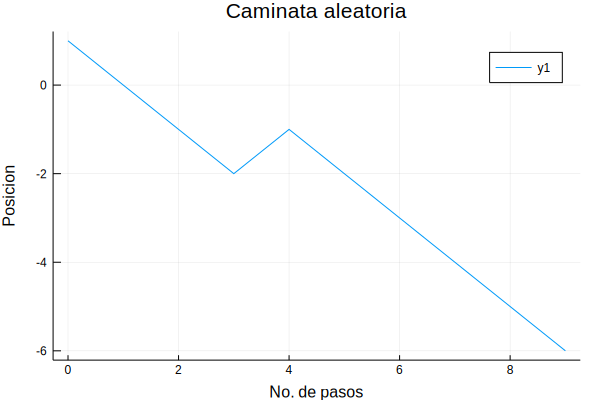

In [106]:
plot([0,1,2,3,4,5,6,7,8,9],camino1,xlabel="No. de pasos",ylabel="Posicion",title="Caminata aleatoria")

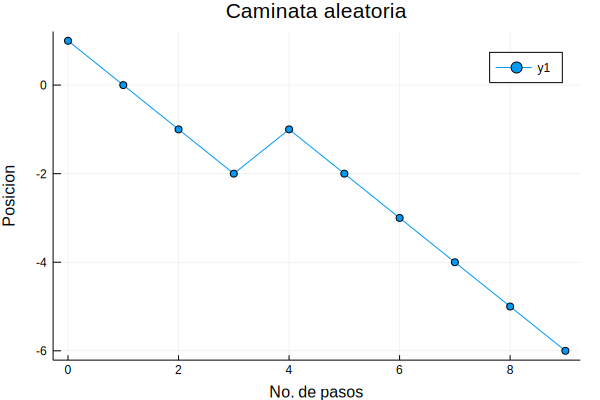

In [107]:
plot([0,1,2,3,4,5,6,7,8,9],camino1,xlabel="No. de pasos",ylabel="Posicion",title="Caminata aleatoria",m="o")

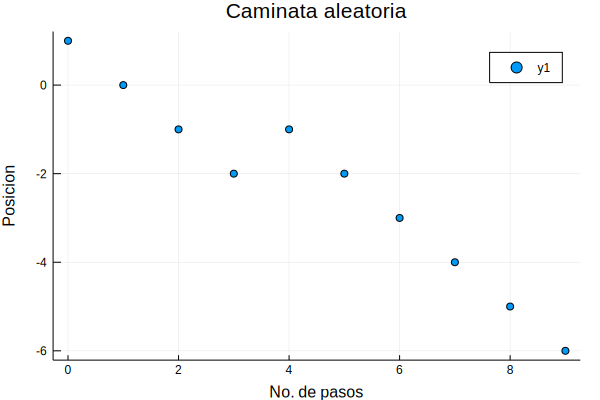

In [118]:
scatter(Range(0:9),camino1,xlabel="No. de pasos",ylabel="Posicion",title="Caminata aleatoria")

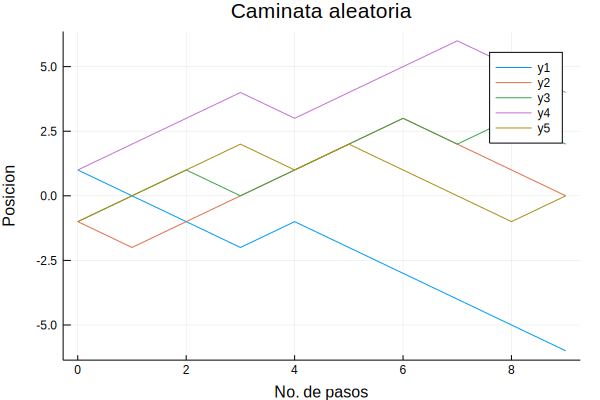

In [110]:
plot([0,1,2,3,4,5,6,7,8,9],camino1,xlabel="No. de pasos",ylabel="Posicion",title="Caminata aleatoria")
plot!([0,1,2,3,4,5,6,7,8,9],camino2,xlabel="No. de pasos",ylabel="Posicion",title="Caminata aleatoria")
plot!([0,1,2,3,4,5,6,7,8,9],camino3,xlabel="No. de pasos",ylabel="Posicion",title="Caminata aleatoria")
plot!([0,1,2,3,4,5,6,7,8,9],camino4,xlabel="No. de pasos",ylabel="Posicion",title="Caminata aleatoria")
plot!([0,1,2,3,4,5,6,7,8,9],camino5,xlabel="No. de pasos",ylabel="Posicion",title="Caminata aleatoria")

#### Ejercicio 13

Ahora podemos empezar a ver cosas interesantes.

(i) Utiliza un bucle `for` para dibujar 100 caminos con 100 pasos cada uno. Para hacerlo, primero crea un `plot` vacío con el nombre `p` y sin leyenda (`leg=false`). Luego dibuja los caminantes. Al final, muestra el objeto `p`.

(ii) ¿Qué observas? ¿Cómo parece crecer la nube de caminantes en el tiempo? ¿Cómo podrías pensar en averiguar eso numéricamente? **Opcional: ¡Hazlo!

(iii) En la gráfica, los caminos se sobreponen, así que no se puede ver cuántos caminantes pasaron por un punto dado en cada paso. En un paso dado, ¿qué harías para ver esto? **Opcional: ¡Hazlo!

In [115]:
p=plot(leg=false)
m=100
cam=[]
    for i in 1:m
        push!(cam,caminata(m))
end

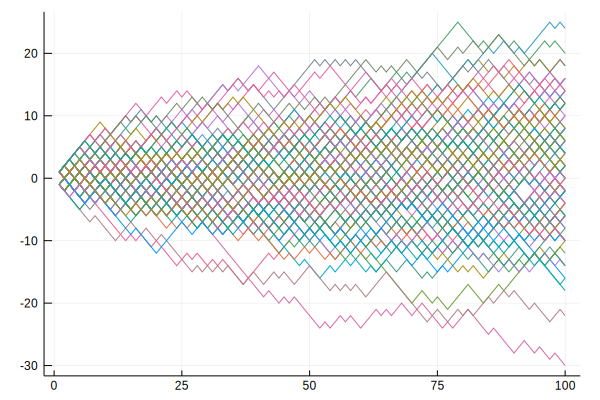

In [120]:
p